In [1]:
# Importing libraries
import cv2, glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
symp_path='Data/256_crop_symptoms'
nosymp_path='Data/256_crop_nosymptoms'
image_names=glob.glob(symp_path+"/*.tiff")+glob.glob(nosymp_path+"/*.tiff")
symp_no = len(glob.glob(symp_path+"/*.tiff"))
nosymp_no = len(glob.glob(nosymp_path+"/*.tiff"))
total_images=len(image_names)
print('Total number of images having symptoms of DR:',symp_no)
print('Total number of images having no symptoms of DR:',nosymp_no)
print('Total number of images:',total_images)

Total number of images having symptoms of DR: 595
Total number of images having no symptoms of DR: 1468
Total number of images: 2063


Image: Data/256_crop_symptoms/Data/256_crop_symptoms/1541_right.tiff


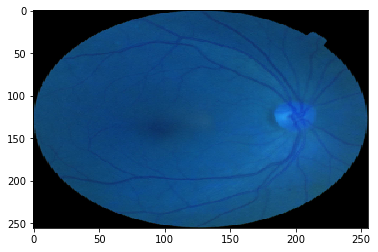

Shape:  (256, 256, 3)
(2063, 256, 256, 3)


In [3]:
rand = np.random.randint(symp_no)
rand_img_name=symp_path+'/'+image_names[rand]
print('Image:',rand_img_name)
x=cv2.imread(image_names[rand])
plt.imshow(x,aspect='auto')
plt.show()
img_r,img_c,no_channels=x.shape
print('Shape: ',x.shape)
X=np.ndarray(shape=(total_images,img_r,img_c,no_channels))
for index,image_name in enumerate(image_names):
    X[index,:,:,:] = cv2.imread(image_names[rand])
    break
print(X.shape)

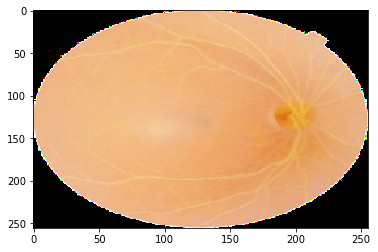

In [4]:
Y=np.zeros(total_images)
Y[0:symp_no]=1
# 1 --> symptoms
# 2 --> no symptoms
plt.imshow(X[0],aspect='auto')
plt.show()

In [5]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels

import psutil
print(psutil.virtual_memory())

svmem(total=8255795200, available=4685389824, percent=43.2, used=2752729088, free=4251373568, active=2921132032, inactive=780066816, buffers=52740096, cached=1198952448, shared=550735872)


In [6]:
shuffled_X,shuffled_Y=randomize(X,Y)
plt.imshow(shuffled_X,aspect='auto')
plt.show()

MemoryError: 

In [ ]:
train_X=shuffled_X[:1562]
train_Y=shuffled_Y[:1562]
val_X=shuffled_X[1563:1563+250]
val_Y=shuffled_Y[1563:1563+250]
test_X=shuffled_X[1563+250:]
test_Y=shuffled_Y[1563+250:]

print(psutil.virtual_memory())
plt.imshow(shuffled_X[0],aspect='auto')
plt.show()

In [ ]:
print('Train shape: ',train_X.shape,'Train Labels',train_Y.shape)
print('Dev shape: ',val_X.shape,'Dev Labels',val_Y.shape)
print('Test shape: ',test_X.shape,'Test Labels',test_Y.shape)
del X,Y

In [ ]:
print(psutil.virtual_memory())

In [ ]:
#Flattening the datasets
def flatten(X):
    return X.reshape(X.shape[0],-1).T

train_X=flatten(train_X)
val_X=flatten(val_X)
test_X=flatten(test_X)

train_Y=flatten(train_Y)
val_Y=flatten(val_Y)
test_Y=flatten(test_Y)


In [ ]:
print('Train shape: ',train_X.shape,'Train Labels',train_Y.shape)
print('Dev shape: ',val_X.shape,'Dev Labels',val_Y.shape)
print('Test shape: ',test_X.shape,'Test Labels',test_Y.shape)

In [ ]:
#Augmentation

In [ ]:
print(test_X)